<a href="https://colab.research.google.com/github/Ronaldvarela852/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df= pd.read_json('/content/drive/MyDrive/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [167]:
customer = pd.json_normalize(df['customer'], sep=':')


In [168]:
phone = pd.json_normalize(df['phone'], sep=':')


In [169]:
internet = pd.json_normalize(df['internet'], sep=':')

In [170]:
account = pd.json_normalize(df['account'], sep=':')

In [171]:
customerID = df['customerID']

In [172]:
Churn	= df['Churn']

In [220]:
df_normalizado = [customerID, Churn, customer, phone, internet, account]

In [174]:
df_concatenado = pd.concat(df_normalizado, ignore_index=False, axis=1)
df_concatenado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges:Monthly,Charges:Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [175]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [176]:
df=df_concatenado

In [177]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges:Monthly',
       'Charges:Total'],
      dtype='object')

In [178]:
df.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges:Monthly,Charges:Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


#🔧 Transformación

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [180]:
valores_ausentes = df.isnull().sum()
print("Valores ausentes por columna:\n", valores_ausentes)

Valores ausentes por columna:
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges:Monthly     0
Charges:Total       0
dtype: int64


In [181]:
duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

Número de filas duplicadas: 0


In [182]:
df['Charges:Monthly']

,Charges:Monthly
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90
...,...
7262,55.15
7263,85.10
7264,50.30
7265,67.85


In [183]:
df['Charges:Monthly'] = df['Charges:Monthly'].astype(float)

In [184]:
df['Charges:Total']=pd.to_numeric(df['Charges:Total'], errors='coerce')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [186]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [187]:
df['Churn'] = df['Churn'].str.strip()

In [188]:
df['Churn'] = df['Churn'].replace('', np.nan)

In [189]:
df['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [190]:
df.describe()

,SeniorCitizen,tenure,Charges:Monthly,Charges:Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


In [233]:
Cuentas_Diarias = (df['Charges:Monthly']/30).rename('Cuentas Diarias')
Cuentas_Diarias

,Cuentas Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [234]:
Cuentas_Diarias

,Cuentas Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


#📊 Carga y análisis

##Distribución de la evasión

In [193]:
# Contar frecuencia de cada categoría
Churn_Counts = df['Churn'].value_counts()

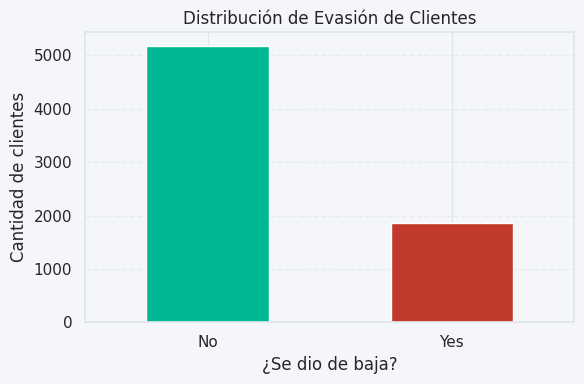

In [194]:
# Crear gráfico de barras
plt.figure(figsize=(6, 4))
Churn_Counts.plot(kind='bar', color=['#00b894', '#c0392b'])

plt.title('Distribución de Evasión de Clientes')
plt.xlabel('¿Se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

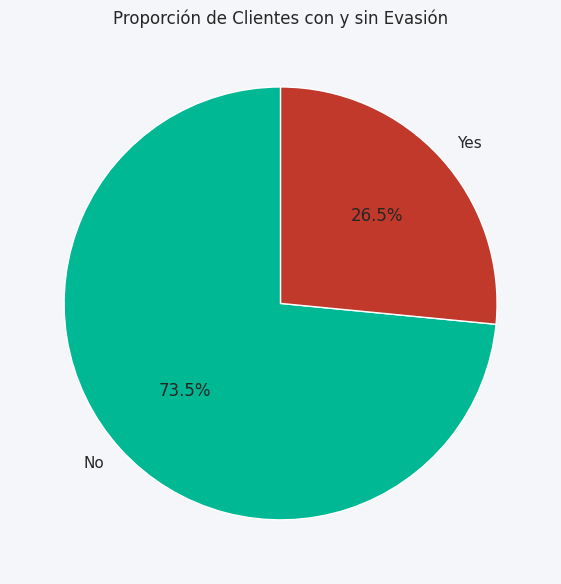

In [195]:
plt.figure(figsize=(6, 6))
Churn_Counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#00b894', '#c0392b'])

plt.title('Proporción de Clientes con y sin Evasión')
plt.ylabel('')
plt.tight_layout()
plt.show()

##Analisis de evasión segun variables categóricas

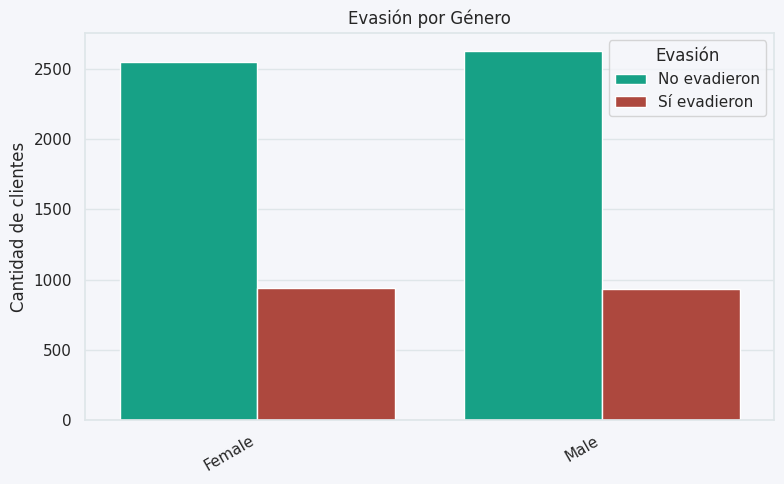


----------------------------------------------------------------------------------------------------



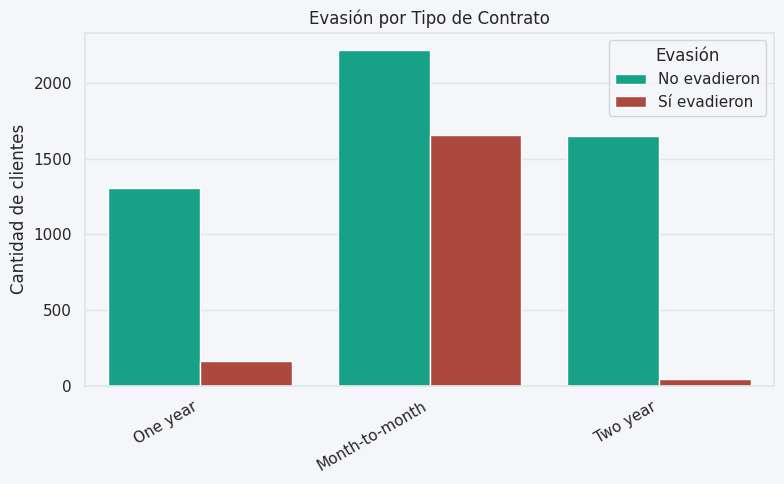


----------------------------------------------------------------------------------------------------



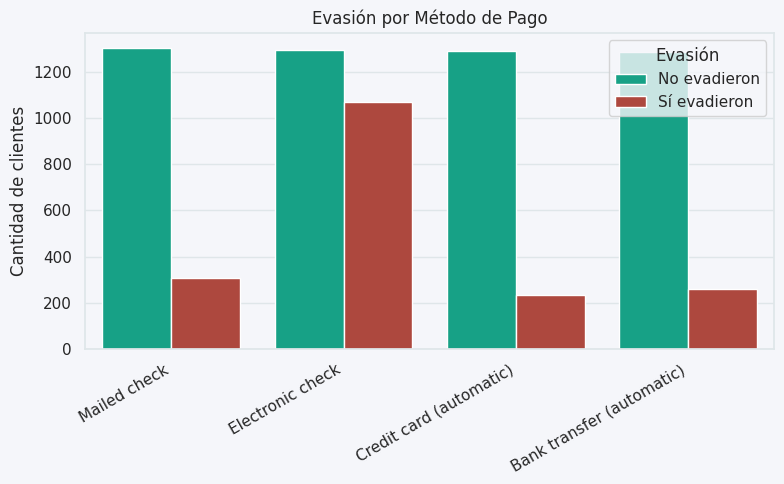


----------------------------------------------------------------------------------------------------



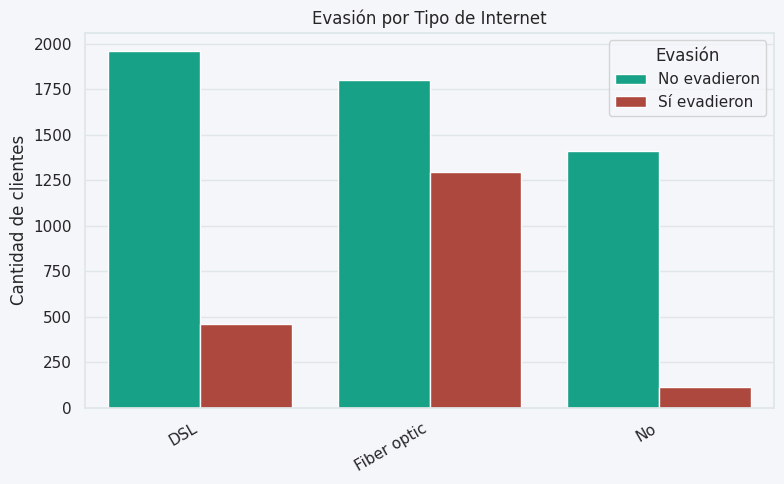


----------------------------------------------------------------------------------------------------



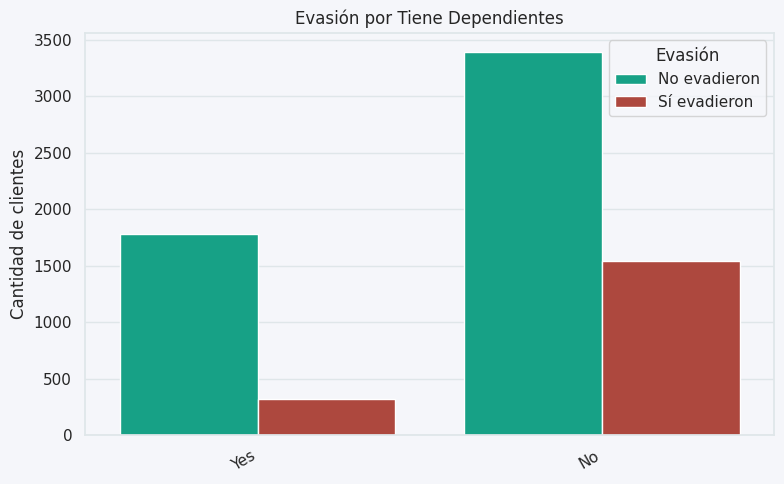


----------------------------------------------------------------------------------------------------



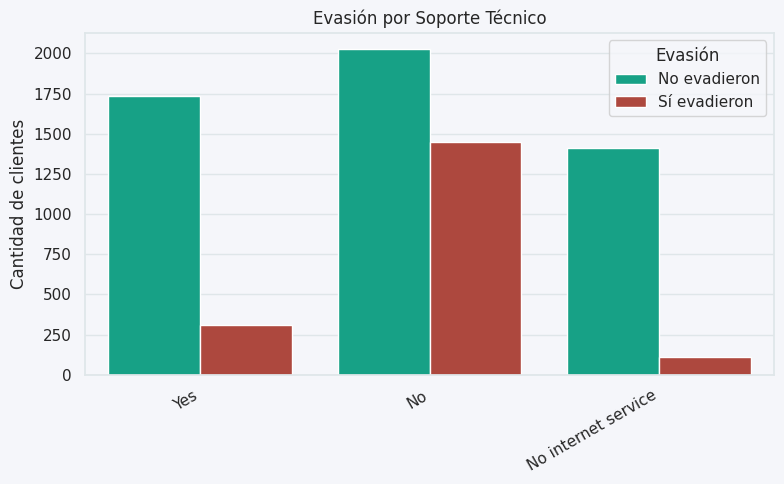


----------------------------------------------------------------------------------------------------



In [224]:
colores_personalizados = {
    'No': '#00b894',
    'Yes': '#c0392b'
}

# Lista de variables categóricas a analizar
variables = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'Dependents', 'TechSupport']
nombres_es = {
    'gender': 'Género',
    'Contract': 'Tipo de Contrato',
    'PaymentMethod': 'Método de Pago',
    'InternetService': 'Tipo de Internet',
    'Dependents': 'Tiene Dependientes',
    'TechSupport': 'Soporte Técnico'
}

# Iterar y graficar cada variable
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var, hue='Churn', palette=colores_personalizados)
    plt.title(f'Evasión por {nombres_es[var]}')
    plt.xlabel('')
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Evasión', labels=['No evadieron', 'Sí evadieron'])
    plt.tight_layout()
    plt.show()

    print('\n' + '-'*100 + '\n')


##Analisis de evasión por variables numéricas

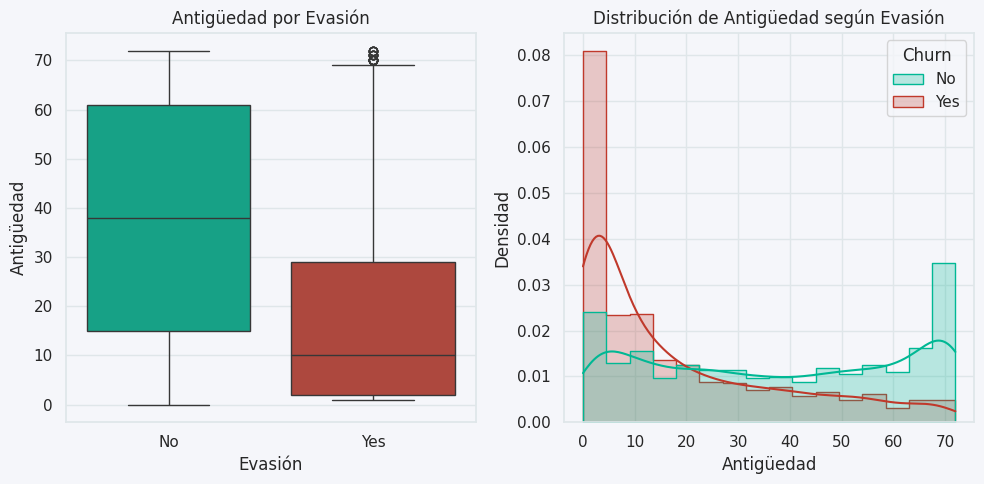


----------------------------------------------------------------------------------------------------



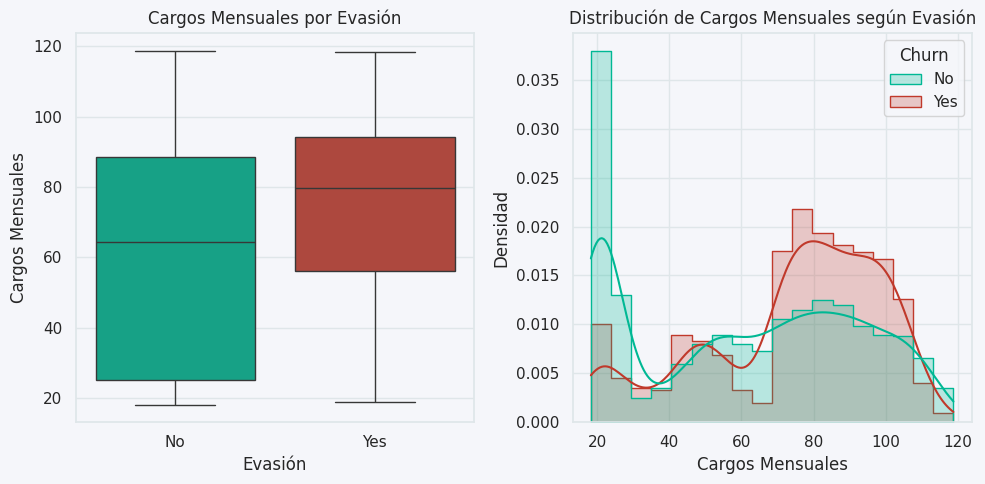


----------------------------------------------------------------------------------------------------



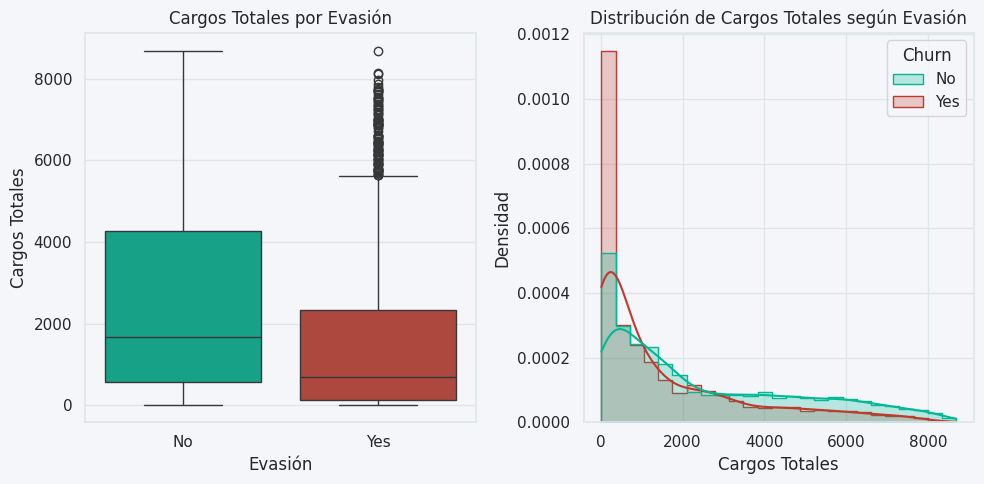


----------------------------------------------------------------------------------------------------



In [223]:
# Paleta para la variable Churn
colores_personalizados = {
    'No': '#00b894',
    'Yes': '#c0392b'
}

# Lista de variables numéricas
variables_numericas = ['tenure', 'Charges:Monthly', 'Charges:Total']
variables_numericas_es = {
    'tenure': 'Antigüedad',
    'Charges:Monthly': 'Cargos Mensuales',
    'Charges:Total': 'Cargos Totales'
}


# Gráficos comparativos
for var in variables_numericas:
    plt.figure(figsize=(10, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Churn', hue='Churn', y=var, palette=colores_personalizados, legend=False)
    plt.title(f'{variables_numericas_es[var]} por Evasión')
    plt.xlabel('Evasión')
    plt.ylabel(variables_numericas_es[var])

    # Histograma
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=var, hue='Churn', palette=colores_personalizados, kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {variables_numericas_es[var]} según Evasión')
    plt.xlabel(variables_numericas_es[var])
    plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()

    print('\n' + '-'*100 + '\n')


#📄Informe final